# Buneman and weak cold beam instabilities with UPIC-ES

## General dispersion relation

Consider two cold species, which we will generically label species 1 and species 2, each with constant drift velocity $\vec{v}_{0,1}$ and $\vec{v}_{0,2}$ and fluctuating velocity $\tilde{\vec{v}}_1$ and $\tilde{\vec{v}}_2$, respectively. The linearized Navier-Stokes equation for each species is then

$$ \frac{d}{d t} \tilde{\vec{v}}_s = \frac{\partial}{\partial t} \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}}. $$

In addition, the continuity equation for each species is

$$ \frac{\partial}{\partial t} \tilde{n}_s + n_{0,s} \nabla \cdot \tilde{\vec{v}}_s + \vec{v}_{0,s} \cdot \nabla \tilde{n}_s = 0. $$

Poisson's equation then yields

$$ \nabla \cdot \tilde{\vec{E}} = 4\pi \sum_{s}q_s \tilde{n}_s. $$

If we assume a plane wave solution of the form $\tilde{\vec{E}} = \vec{E}_0 e^{i(\vec{k} \cdot \vec{r} - \omega t)}$, then the dynamical equation turns into

$$ (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})\tilde{\vec{v}}_s = \frac{q_s}{m_s} \tilde{\vec{E}} \\
\Rightarrow \tilde{\vec{v}}_s = \frac{q_s \tilde{\vec{E}}}{i m_s (-i\omega + i \vec{k} \cdot \vec{v}_{0,s})}. $$

Similarly, the continuity equation can be rewritten as

$$ -i\omega \tilde{n}_s + i n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s + i \vec{k} \cdot \vec{v}_{0,s} \tilde{n}_s = 0 \\
\Rightarrow \tilde{n}_s = \frac{n_{0,s} \vec{k} \cdot \tilde{\vec{v}}_s}{\omega - \vec{k} \cdot \vec{v}_{0,s}} = \frac{-q_s n_{0,s} \vec{k} \cdot \tilde{\vec{E}}}{i m_s (\omega - \vec{k} \cdot \vec{v}_{0,s})^2}. $$

If we substitute this expression for $\tilde{n}_s$ into Poisson's equation, after rearranging we find that

$$ \left(1 - \sum_s\frac{\omega_{p,s}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,s})^2}\right)i \vec{k} \cdot \tilde{\vec{E}} = 0. $$

Recognizing that $\nabla \cdot \tilde{\vec{D}} = \nabla \cdot (\epsilon \tilde{\vec{E}}) = \epsilon i \vec{k} \cdot \tilde{\vec{E}}$, the term in parenthesis is then our dielectric constant. Setting this equal to zero gives the dispersion relation as

\begin{equation}
1 - \frac{\omega_{p,1}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,1})^2} - \frac{\omega_{p,2}^2}{(\omega - \vec{k} \cdot \vec{v}_{0,2})^2} = 0. 
\end{equation}

This equation can be used for various types of two-stream instabilities, for which the parameters $\omega_{p,s}$ and $\vec{v}_{0,s}$ can be adjusted. Now let us consider the case where the two species are identical with opposite drift velocities of the same magnitude.

## Buneman instability

Consider a stationary background of ions with the electron plasma moving with a constant drift velocity $\vec{v}_0$. This could be produced, for example, by a current-carrying plasma. Then the dispersion relation is reduced to

$$ 
1 = \omega_{pe}^2 \left(\frac{m_e/m_i}{\omega^2} + \frac{1}{(\omega - \vec{k} \cdot \vec{v}_0)^2}\right).
$$ 

This quartic equation can be cast into a simpler form by defining $x \equiv \omega/\omega_{pe}$ and $\alpha \equiv \vec{k} \cdot \vec{v}_0/\omega_{pe}$ to get

$$ 
1 = \frac{m_e/m_i}{x^2} + \frac{1}{(x-\alpha)^2}.
$$ 

#### Parameters

From the above equation, it is seen that the two free parameters in the problem are the ratio of electron to ion mass, $m_e/m_i$, and $\alpha = \vec{k} \cdot \vec{v}_0/\omega_{pe}$, or simply the ratio $\vec{k} \cdot \vec{v}_0/n_0$.

#### Solution to the dispersion relation

If we define the right-hand side of the equation as

$$ 
\chi (x) = \frac{m_e/m_i}{x^2} + \frac{1}{(x-\alpha)^2},
$$ 

then we seek for solutions to $\chi (x) = 1$. In the below figure, we see that two of the roots for $\omega$ are always real, and the other two roots may be real or complex depending on the value of $\alpha$. To find when the $\omega$ roots begin to be complex, we seek to minimize $\chi(x)$. Setting $\frac{m_e}{m_i} \approx \frac{1}{1836}$ and solving $\chi '(x)=0$ yields $x_{min} \approx 0.075\alpha$. Then setting $\chi(x_{min}) \geq 1$ means that to have complex roots we need $\alpha \lesssim 1.12$. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider
%matplotlib inline

def plot_chi(alpha, mass_ratio):
    x = np.arange(-2.0, 3.0, 0.001)
    chi = mass_ratio / x ** 2 + 1 / (x - alpha) ** 2
    
    plt.figure(figsize=(10,8))
    plt.plot(x, chi)
    plt.plot([-2.0, 3.0],[1.0, 1.0],'k--')
    plt.xlim([-2, 3])
    plt.ylim([0, 2])
    plt.tick_params(axis='both', labelsize=20)
    plt.xlabel('$\omega / \omega_{pe}$', size=20)
    plt.ylabel('$\chi(x)$', size = 20)
    plt.show()

    
interact(plot_chi, alpha=FloatSlider(min=0.9, max=1.5, step=.01, description=r'$\alpha$', value = 1.12), mass_ratio=fixed(1.0/1836.0))

interactive(children=(FloatSlider(value=1.12, description='$\\alpha$', max=1.5, min=0.9, step=0.01), Output())…

<function __main__.plot_chi(alpha, mass_ratio)>

If we let $\omega = \omega_R+i \omega_I$, then solving for $\omega_I$ gives the growth rate. The real and imaginary parts of the frequency are shown in the below figure.

<img src="omega_roots.png">

In [3]:
## Here we make acell to make the plot above
import sys

## comment out the line below if you are running this notebook under Docker.  If you do that then 
## you don't need to import OSIRIS again.  If you are running this cell by itself, you need
## the following lines
#sys.path.append("../../analysis")
import osiris
##
##
##

import mpmath

def buneman_growth_rate(alphaarray,rmass):

    nalpha=alphaarray.shape[0]

    alphamin=alphaarray[0]
    alphamax=alphaarray[nalpha-1]

    prev_root=complex(0,0)

    growth_rate=np.zeros(nalpha)
    growth_rate_r = np.zeros(nalpha)

    def buneman_disp(x):
        return (x**-(-rmass+x**2)*(x-alphaarray[0])**2)
    new_root=mpmath.findroot(buneman_disp,prev_root,solver='newton')
    growth_rate[0]=new_root.imag
    prev_root=complex(new_root.real,new_root.imag)
#    print(repr(prev_root))

    for i in range(1,nalpha):
        # print(repr(i))
        def buneman_disp2(x):
            return (x**2-(-rmass+x**2)*(x-alphaarray[i])**2)

        new_root =  mpmath.findroot(buneman_disp2, prev_root,solver='muller')
        growth_rate[i]=new_root.imag
        growth_rate_r[i] = new_root.real
        prev_root=complex(new_root.real,new_root.imag)

    return growth_rate, growth_rate_r
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, FloatSlider
%matplotlib inline

def plot_growth(mass_ratio):
    alpha = np.arange(0, 2.0, 0.01)
    # growth_rate = alpha
    # growth_rate = 1.0 * alpha*alpha
    growth_rate, growth_rate_r = buneman_growth_rate(alpha,mass_ratio)
    plt.figure(figsize=(10,8))
    plt.plot(alpha,growth_rate,'r.',label='Growth Rate')
    plt.plot(alpha,growth_rate_r,'g',label='Real Frequency')
#     plt.plot([-2.0, 3.0],[1.0, 1.0],'k--')
    plt.xlim([0, 1.2])
    plt.ylim([0, 0.25])
    plt.tick_params(axis='both', labelsize=18)
    plt.ylabel('$\omega / \omega_{pe}$', size=24)
    plt.xlabel(r'$\alpha$', size = 24)
    plt.legend(fontsize=20)
    plt.grid(True)
    plt.show()

    
interact(plot_growth, mass_ratio=FloatSlider(min=0.005, max=0.1, step=.002, description='$m/M$', value = 0.001))

interactive(children=(FloatSlider(value=0.005, description='$m/M$', max=0.1, min=0.005, step=0.002), Output())…

<function __main__.plot_growth(mass_ratio)>

# Simulations with a Particle-in-Cell Code

In [ ]:
#Edit some things below

In this project, you will be simulating plasmas with the electrostatic code UPIC-ES.   The normalization of the code is $\omega_p = 1$, and the grid size $\Delta x = 1$.  Therefore, velocity is measured in units of [$\Delta x \omega_p$].


Each plasma electron is initialized with positions (only in x) such that the density is uniform. The ions are initialized at the same positions but with a larger mass.  Each electron is also initialized with velocities ($v_1$, $v_2$, $v_3$) or momentum ($mv_1$, $mv_2$, $mv_3$) from a Maxwellian in each direction. The particles then begin to move in the self-consistent fields that their charge density produce, from Poisson's law:

\begin{equation}
\nabla^2 \phi = \rho
\end{equation}



You will be looking at plots of the electric field, $\vec{E}$, and the electrostatic potential, $\phi$. 

### The following lines must always be executed before running anything else.

Reminder: Hit Shift+Enter to run a cell, or select the cell and click on the "Run" button in the top menu bar

In [4]:
import osiris
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from mpmath import *
%matplotlib inline
from analysis import *
from h5_utilities import *
import os

title_font = {'fontname':'serif', 'size':'20', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'}
axis_font = {'fontname':'serif', 'size':'34'}
plt.rc('font',size=20,family="serif")

## Case 1 :  $V_0=3 \Delta x \omega_p$

### Visualize the theory

The dispersion relation for the Buneman instability does not have an analytical solution. The theory curve is produced through root finding, then constructing an interpolation function for later use.  Here we produce the theory curve for our particular simulation, which has a beam velocity of 3 $\Delta x \omega_{pe}$.

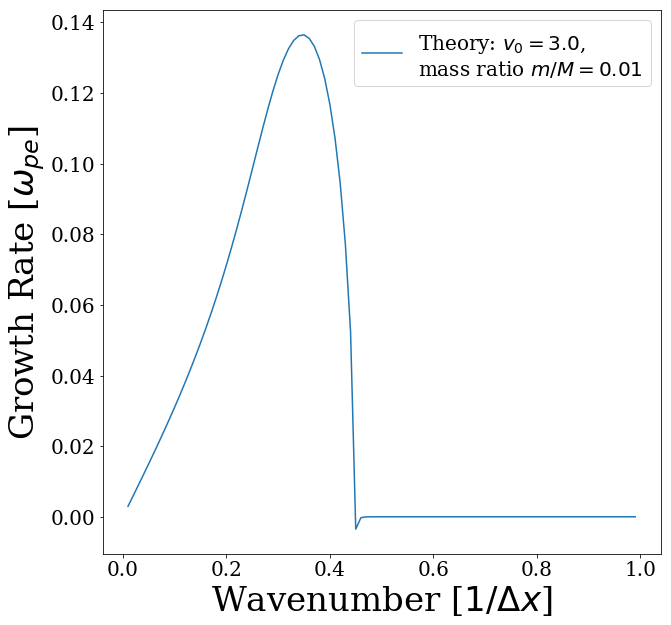

In [5]:
alpha=np.linspace(0,3,num=200)
rmass=1.0/100.0
growth_rate=osiris.buneman_growth_rate(alpha,rmass)

growth_rate_func=interp1d(alpha,np.abs(growth_rate),kind='cubic')

v0=3.0

karray=np.arange(0.01,1.0,0.01)
nk=49
growth_rate=np.zeros(nk)
growth_rate=growth_rate_func(karray*v0)
plt.figure(figsize=(10,10))
plt.plot(karray,growth_rate,label='Theory: $v_0 = '+repr(v0)+'$,\n'+'mass ratio $m/M = '+repr(rmass)+'$')

plt.xlabel('Wavenumber [$1/\Delta x$]',**axis_font)
plt.ylabel('Growth Rate [$\omega_{pe}$]',**axis_font)
plt.legend()
plt.show()

For a mass ratio of 1/100, we have unstable modes for $\alpha \lesssim 1.34$, or $k \lesssim 0.45 \Delta x^{-1}$.  The most unstable mode occurs at $\alpha \approx 1.04$, or $k \approx 0.35 \Delta x^{-1}$.

### Run the simulation:

In [6]:
dirname = 'buneman'
osiris.run_upic_es(rundir=dirname,inputfile='buneman.txt')

run_upic_es completed normally


Run the cell below to look at the x-component of the electric field as a function of time for the various modes in the simulation.

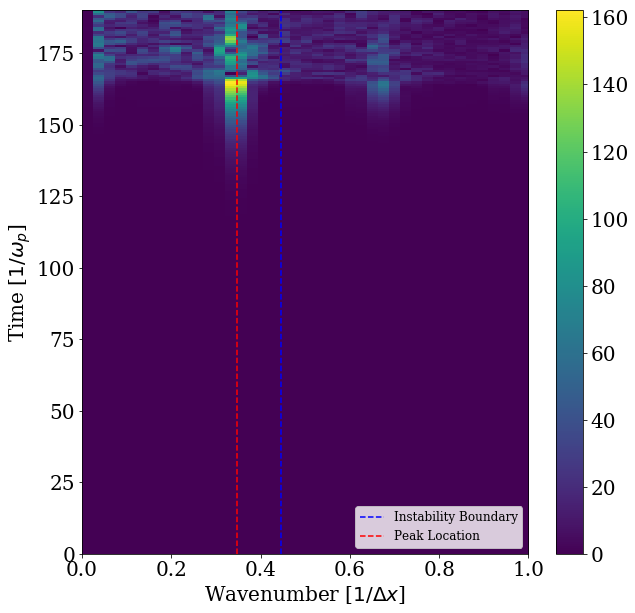

In [8]:
# read the history file, plot it vs time and space

workdir = os.getcwd()
dirname ='buneman'
filename=workdir+'/'+dirname+'/Ex.h5'
# print(filename)
test4=read_hdf(filename)
# here we fourier analyze the data in space
#
# k_data=np.fft.fft(test.data,axis=1)
k_data=np.fft.fft(test4.data,axis=1)
# k_data_2=np.fft.fft(k_data,axis=0)

test4.data=np.abs(k_data)

test4.axes[0].axis_max=2.0*3.1415926


# test4.data=np.log10(np.real(test4.data)+1e-10)
plt.figure(figsize=(10,10))
plotme(test4)
k_bound=0.446664
k_max=0.34713
plt.plot([k_bound,k_bound],[0,200],'b--',label='Instability Boundary') 
plt.plot([k_max,k_max],[0,200],'r--',label='Peak Location')
plt.xlim(0,1)
plt.ylim(0,190)
plt.xlabel('Wavenumber [$1/\Delta x$]')
plt.ylabel('Time [$1/\omega_p$]')
# plt.ylim(0,50)
# plt.ylim(tlim[0],tlim[1])
plt.legend(loc='lower right',prop={'size': 12})
plt.show()

You can observe that the signal occurs near the modes where instability is predicted.   The blue vertical line indicates where the growth rate goes to 0 (at $k \approx 0.45$).  There should be no instability to the right of the plot.  The red vertical line indicates the location of the most unstable mode ($k \approx 0.35$).   

* Do the simulation results agree with theory?
    
* What are the sources of the noise for signals whose wavenumber to the right of the BLUE line?

* Do you recognize any patterns in the mode strengths going from left to right?  What might explain those patterns?

-----
Next we'll look at the mode histories in greater detail, and compare the simulation data against theory.

Plot the electric field modes individually and compare their growth rate to the theoretical growth rate.

The most unstable mode occurs at mode 14, but the theory agrees well for modes 8-14

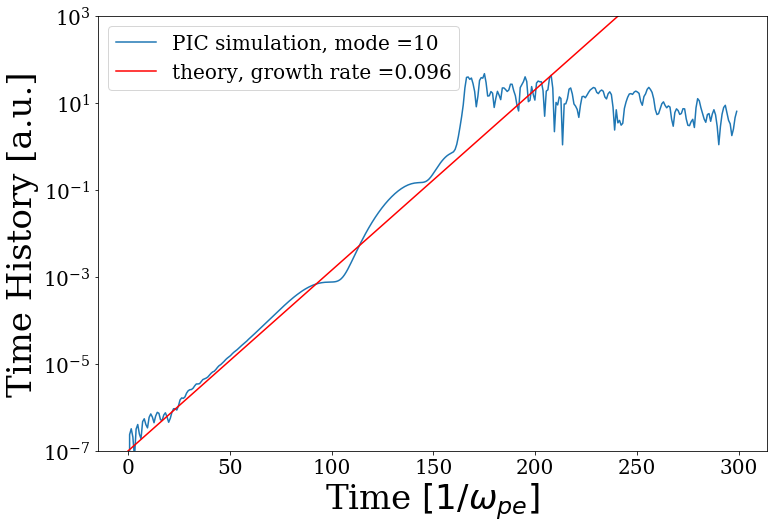

In [9]:
# This cell we try to compare data with theory:

nx=test4.data.shape[1]
nt=test4.data.shape[0]
# print(repr(nt))
dk=2*3.1415926/nx
# print('Delta k = '+repr(dk))


# To compare with theory, just specify the mode you want to look at here
#
display_mode = 10
bracket = False
#
#

v0=3.0

alpha = v0 * dk * (display_mode)
# growth_rate = 0.0
# if (alpha<np.sqrt(2)): 
growth_rate=growth_rate_func(alpha)[()]

taxis=np.linspace(0,test4.axes[1].axis_max,nt)
stream_theory=np.zeros(nt)
stream_theory_plus=np.zeros(nt)
stream_theory_minus=np.zeros(nt)
init_amplitude=1e-7
for it in range(0,nt):
    stream_theory[it]=init_amplitude*np.exp(growth_rate*taxis[it])
    stream_theory_plus[it]=init_amplitude*np.exp(1.15*growth_rate*taxis[it])
    stream_theory_minus[it]=init_amplitude*np.exp(0.85*growth_rate*taxis[it])

plt.figure(figsize=(12,8))
plt.semilogy(taxis,test4.data[:,display_mode],label='PIC simulation, mode ='+repr(display_mode))
plt.semilogy(taxis,stream_theory,'r',label='theory, growth rate ='+'%.3f'%growth_rate)

if (bracket):
    plt.semilogy(taxis,stream_theory_plus,'g.')

    plt.semilogy(taxis,stream_theory_minus,'g.')


plt.ylim((1e-7,1000))
plt.legend()
plt.xlabel('Time $[1/\omega_{pe}]$',**axis_font)
plt.ylabel('Time History [a.u.]', **axis_font)
  
    
plt.show()

Plot the evolution of the electrostatic potential in real space.

* Is there a point in time at which the potential ceases to grow?  Do you expect the field to grow without bounds or is there a physical reason for the growth to stop?

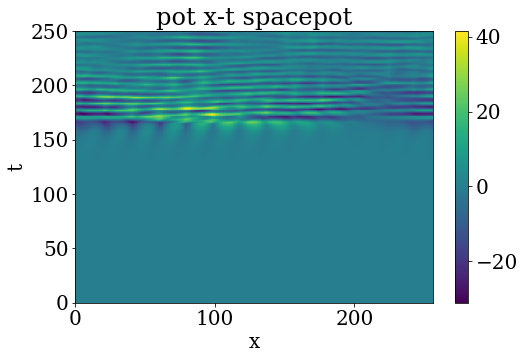

In [10]:
dirname = 'buneman'

osiris.plot_xt_arb(rundir=dirname, field='pot',tlim=[0,250])

Finally, here we visualize the evolution of the electron phase space (x,vx).

* Examine the evolution of the phase space near the time where the potential stops to grow. What is going on at this time in the simulation?

* Think about using the words "linear" and "nonlinear" to describe these phenomena.

In [11]:
dirname='buneman'

osiris.phasespace_movie(rundir=dirname)

000020


interactive(children=(IntSlider(value=0, description='file_no', max=1480, step=20), Output()), _dom_classes=('…

In [17]:
## for widgets
import glob
from ipywidgets import interact_manual,fixed,Layout,interact, FloatSlider
##

import ipywidgets as widgets
interact_calc=interact_manual.options(manual_name="Make New Input and Run")
import os



    

def buneman_deck_maker(iname='buneman.txt', oname='case1.txt', vx0=3.0, rmass=100,
             tend=200):


    with open(iname) as osdata:
        data = osdata.readlines()

    for i in range(len(data)):
        if 'VX0 =' in data[i]:
            data[i] = ' VX0 = '+str(vx0)+',\n'
        if 'WAVEW' in data[i]:
            data[i] = ' RMASS = '+str(rmass)+',\n'
        if 'TEND' in data[i]:
            data[i] = ' TEND = '+str(tend)+',\n'

    with open(oname,'w') as f:
        for line in data:
            f.write(line)
    
    print('New file '+oname+' is written.')
    dirname = oname.strip('.txt')
    print('Running OSIRIS in directory '+dirname+'...')
    osiris.run_upic_es(rundir=dirname,inputfile=oname)
    outdirname=oname.split(".")[0]
    print(outdirname)
    # e_history=energy_history(dirname=outdirname)
    # taxis=np.arange(len(e_history))*0.2
    # plt.plot(taxis,e_history)
    # plt.title('Energy Deviation vs Time (in %)')
    # plt.xlabel('Time ($\omega_p^{-1}$)')   
    # plt.show()
 #
    osiris.phasespace_movie(rundir=dirname)
    
    print('Done')

def buneman_widget():
    style = {'description_width': '350px'}
    layout = Layout(width='55%')

    a = widgets.Text(value='buneman.txt', description='Template Input File:',style=style,layout=layout)
    b = widgets.Text(value='case1.txt', description='New Output File:',style=style,layout=layout)
    c = widgets.BoundedFloatText(value=3, min=0.0, max=10.0, description='Electron Drift Velocity:',style=style,layout=layout)
    d = widgets.FloatText(value=100.0,description='Mass Ratio (M/m):',style=style,layout=layout)
    e = widgets.FloatText(value=200.0,description='TEND or the Total Simulation Time:',style=style,layout=layout)
  

    im = interact_calc(buneman_deck_maker, iname=a,oname=b,VX0=c,RMASS=d, tend=e);
    
    im.widget.manual_button.layout.width='250px'

In [18]:
buneman_widget()

interactive(children=(Text(value='buneman.txt', description='Template Input File:', layout=Layout(width='55%')…

----
## Weak Cold Beam Instability (Bump on Tail)

Next we transition to another instability that involves nearly identical mathematics to the Buneman instability.

Consider a stationary electron-ion plasma with a fast, weak beam of electrons passing through it. Here "fast" implies $v_b \gg \bar{v}_e, \bar{v}_i$, "weak" implies $n_b/n_0 \ll 1$, and "cold" implies $v_b \gg \bar{v}_b$. Since $\omega_{pi} \ll \omega_{pe}$, we neglect the ion contribution to the dispersion relation and obtain

\begin{align*}
1 = \frac{\omega_{pe}^2}{\omega^2} + \frac{\omega_{pb}^2}{(\omega-\vec{k} \cdot \vec{v}_b)^2}.
\end{align*}

Defining $x \equiv \omega/\omega_{pb}$ and $\alpha \equiv \vec{k} \cdot \vec{v}_b/\omega_{pb}$, along with recognizing that $\omega_{pe}^2/\omega_{pb}^2 = n_0/n_b$, we then get that

\begin{align*}
1 = \frac{n_0/n_b}{x^2} + \frac{1}{(x-\alpha)^2}.
\end{align*}

This is the exact same equation reached in the Buneman analysis, but with $m_e/m_i$ replaced by $n_0/n_b$.

### Parameters

From the above equation, it is seen that the two free parameters in the problem are the ratio of background to beam density, $n_0/n_b$, and $\alpha = \vec{k} \cdot \vec{v}_b/\omega_{pb}$, or simply the ratio $\vec{k} \cdot \vec{v}_b/n_b$.

### Solution to the dispersion relation

Analysis proceeds exactly as in the discussion for the Buneman instability, but now $n_0/n_b \gg 1$. This results in complex values of $\omega$ for much larger allowable values of $\alpha$ than before. For example, with $n_0/n_b = 2000$, $\omega$ is complex for $\alpha \lesssim 50$.

## Case 2 :  $v_b=10 \Delta x \omega_p$, $n_0/n_b = 100$

### Visualize the theory

The dispersion relation for the Buneman instability does not have an analytical solution. The theory curve is produced through root finding, then constructing an interpolation function for later use.  Here we produce the theory curve for our particular simulation, which has a beam velocity of 3 $\Delta x \omega_{pe}$.

In [ ]:
alpha=np.linspace(0,20,num=200)
rmass=100.0
growth_rate=osiris.buneman_growth_rate(alpha,rmass)

growth_rate_func=interp1d(alpha,np.abs(growth_rate),kind='cubic')

v0=10.0

c=100.0
karray=np.arange(0.01,2,0.01)
nk=49
growth_rate=np.zeros(nk)
growth_rate=growth_rate_func(karray*v0)
plt.figure(figsize=(10,10))
plt.plot(karray,growth_rate,label='Theory: $v_0 = '+repr(v0)+'$,\n'+'den ratio $n_0/n_b = '+repr(c)+'$')

plt.xlabel('Wavenumber [$1/\Delta x$]',**axis_font)
plt.ylabel('Growth Rate [$\omega_{pe}$]',**axis_font)
plt.legend()
plt.show()

For a density ratio of 100, we have unstable modes for $\alpha \lesssim 13.4$, or $k \lesssim 1.34 \Delta x^{-1}$.  The most unstable mode occurs at $\alpha \approx 10.4$, or $k \approx 1.04 \Delta x^{-1}$.

### Run the simulation:

In [ ]:
dirname = 'wcb'
osiris.run_upic_es(rundir=dirname,inputfile='wcb.txt')

Run the cell below to look at the x-component of the electric field as a function of time for the various modes in the simulation.

In [ ]:
# read the history file, plot it vs time and space

workdir = os.getcwd()
dirname ='wcb'
filename=workdir+'/'+dirname+'/Ex.h5'
# print(filename)
test4=read_hdf(filename)
# here we fourier analyze the data in space
#
# k_data=np.fft.fft(test.data,axis=1)
k_data=np.fft.fft(test4.data,axis=1)
# k_data_2=np.fft.fft(k_data,axis=0)

test4.data=np.abs(k_data)

test4.axes[0].axis_max=2.0*3.1415926


# test4.data=np.log10(np.real(test4.data)+1e-10)
plt.figure(figsize=(10,10))
plotme(test4)
k_bound=16.7167
k_max=14.994
plt.plot([k_bound,k_bound],[0,200],'b--',label='Instability Boundary')
plt.plot([k_max,k_max],[0,200],'r--',label='Peak Location')
plt.xlim(0,1)
plt.ylim(0,190)
plt.xlabel('Wavenumber [$1/\Delta x$]')
plt.ylabel('Time [$1/\omega_p$]')
# plt.ylim(0,50)
# plt.ylim(tlim[0],tlim[1])
plt.legend(loc='lower right',prop={'size': 12})
plt.show()

Hmm, looks weird.  Why do we only get the 4th mode unstable?

In [ ]:
# This cell we try to compare data with theory:

nx=test4.data.shape[1]
nt=test4.data.shape[0]
# print(repr(nt))
dk=2*3.1415926/nx
# print('Delta k = '+repr(dk))


# To compare with theory, just specify the mode you want to look at here
#
display_mode = 4
bracket = False
#
#

v0=10.0

alpha = v0 * dk * (display_mode)
# growth_rate = 0.0
# if (alpha<np.sqrt(2)): 
growth_rate=growth_rate_func(alpha)[()]

taxis=np.linspace(0,test4.axes[1].axis_max,nt)
stream_theory=np.zeros(nt)
stream_theory_plus=np.zeros(nt)
stream_theory_minus=np.zeros(nt)
init_amplitude=1e-7
for it in range(0,nt):
    stream_theory[it]=init_amplitude*np.exp(growth_rate*taxis[it])
    stream_theory_plus[it]=init_amplitude*np.exp(1.15*growth_rate*taxis[it])
    stream_theory_minus[it]=init_amplitude*np.exp(0.85*growth_rate*taxis[it])

plt.figure(figsize=(12,8))
plt.semilogy(taxis,test4.data[:,display_mode],label='PIC simulation, mode ='+repr(display_mode))
plt.semilogy(taxis,stream_theory,'r',label='theory, growth rate ='+'%.3f'%growth_rate)

if (bracket):
    plt.semilogy(taxis,stream_theory_plus,'g.')

    plt.semilogy(taxis,stream_theory_minus,'g.')


plt.ylim((1e-7,1000))
plt.legend()
plt.xlabel('Time $[1/\omega_{pe}]$',**axis_font)
plt.ylabel('Time History [a.u.]', **axis_font)
  
    
plt.show()

Plot the evolution of the electrostatic potential in real space.

* Is there a point in time at which the potential ceases to grow?  Do you expect the field to grow without bounds or is there a physical reason for the growth to stop?

In [ ]:
dirname = 'wcb'

osiris.plot_xt_arb(rundir=dirname, field='pot',tlim=[0,250])

Finally, here we visualize the evolution of the electron phase space (x,vx).

* Examine the evolution of the phase space near the time where the potential stops to grow. What is going on at this time in the simulation?

* Think about using the words "linear" and "nonlinear" to describe these phenomena.

In [ ]:
dirname='wcb'

osiris.phaseinteract_upic(rundir=dirname)

In [ ]:
dirname='buneman'
import os
import re
print(os.getcwd())
path=os.getcwd()+'\\'+dirname+'/DIAG/Vx_x/'
# print(path)
files=sorted(os.listdir(path))
# print(len(files))
# print(files)
m = re.search('x_(.+?).', files[1])
start=files[1].find('_x_')+3
end=files[1].find('.')
print(files[1][start:end])
file_interval=int(files[1][start:end])
print(file_interval)


In [ ]:
import sys

#sys.path.append('/Users/Frank Tsung/Documents/Github/pyVisOS/')
import osh5io
import osh5def
import osh5vis

import osh5utils

In [ ]:
import sys
import numpy as np

#sys.path.append('/Users/Frank Tsung/Documents/Github/pyVisOS/')
import osh5io
import osh5def
import osh5vis

import osh5utils

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets



SMALL_SIZE = 20
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font',size=SMALL_SIZE)
plt.rc('axes',titlesize=SMALL_SIZE)
plt.rc('axes',labelsize=MEDIUM_SIZE)
plt.rc('xtick',labelsize=SMALL_SIZE)
plt.rc('ytick',labelsize=SMALL_SIZE)
plt.rc('legend',fontsize=SMALL_SIZE)
plt.rc('figure',titlesize=BIGGER_SIZE)



def phasespace_movie(rundir):
#2345
    import os
    
    
    def something(rundir,file_no):
        
        my_path=os.getcwd()
        #print(my_path)
        working_dir=my_path+'/'+rundir
        #print(working_dir)
        efield_dir=working_dir+'/DIAG/Ex/'
        phase_space_dir=working_dir+'\\DIAG\\Vx_x\\'
        ex_prefix='Ex-0_'
        phase_prefix='vx_x_'
        plt.figure(figsize=(12,6))
        
        filename1=phase_space_dir+phase_prefix+repr(file_no).zfill(6)+'.h5'
        filename2=efield_dir+ex_prefix+repr(file_no).zfill(6)+'.h5'
        
        #print(filename1)
        #print(filename2)
        
        phase_space=np.abs(osh5io.read_h5(filename1))
        # print(repr(phase_space))
        ex=osh5io.read_h5(filename2)
        
        phase_plot=plt.subplot(121)
        #print(repr(phase_space.axes[0].min))
        #print(repr(phase_space.axes[1].min))
        title=phase_space.data_attrs['LONG_NAME']
        time=phase_space.run_attrs['TIME'][0]
        ext_stuff=[phase_space.axes[1].min,phase_space.axes[1].max,phase_space.axes[0].min,phase_space.axes[0].max]
        phase_contour=plt.contourf(phase_space,levels=[0.1,1,2,3,5,10,100,1000,100000],extent=ext_stuff,cmap='Spectral',vmin=1e-1,vmax=100000,
                    norm=colors.LogNorm(vmin=0.1,vmax=100000))
        phase_plot.set_title('Phase Space' +' , t='+repr(time)+' $\omega_{pe}^{-1}$')
        phase_plot.set_xlabel('Position [$\Delta x$]')
        phase_plot.set_ylabel('Velocity [$\omega_{pe} \Delta x$]')
        #plt.colorbar()
        #osh5vis.oscontour(phase_space,levels=[10**-5,10**-3,10**-1,1,10,100],colors='black',linestyles='dashed',vmin=1e-5,vmax=1000)
        plt.contour(phase_space,levels=[0.1,1,2,3,5,10,100,1000,100000],extent=ext_stuff,colors='black',linestyles='dashed')
        plt.colorbar(phase_contour)
        ex_plot = plt.subplot(122)
        
        plt.plot(ex[0,:])
        plt.ylim([-2,2])
        ex_plot.set_xlabel('Position [$\Delta x$]')
        ex_plot.set_ylabel('Electric Field')
        plt.tight_layout()
        plt.show()
#2345        
    my_path=os.getcwd()
    working_dir=my_path+'/'+rundir    
    phase_space_dir=working_dir+'/DIAG/Vx_x/'
    files=sorted(os.listdir(phase_space_dir))
    start=files[1].find('_x_')+3
    end=files[1].find('.')
    print(files[1][start:end])
    file_interval=int(files[1][start:end])
    file_max=(len(files)-1)*file_interval
    
    interact(something,rundir=fixed(rundir),file_no=widgets.IntSlider(min=0,max=file_max,step=file_interval,value=0))
    #something(rundir=rundirname,file_no=20)

        

             
# phasespace_movie('buneman')     
# plt.tight_layout()
# plt.show()
        
    

In [ ]:
osiris.phasespace_movie('buneman')